# Домашнее задание 1: Обработка и анализ изображений
#### Цель: Применить базовые методы обработки изображений для улучшения качества и выделения ключевых признаков.

**Выполнил Михайлов Алексей**

Требования к оформлению:
* Отчет в формате PDF, содержащий:
    * Описание каждого этапа работы.
    * Визуализации (изображения до и после обработки, гистограммы).
    * Краткие выводы и наблюдения по каждому шагу.
* Код программы с комментариями, загруженный на GitHub или приложенный к отчету.
Критерии оценки:
* Полнота выполнения заданий.
* Корректность и качество кода.
* Глубина анализа и выводов.
* Качество оформления отчета.

In [180]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Задание 1. Загрузка и отображение изображения:**
* Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
* С помощью библиотек OpenCV или PIL загрузите изображение в программу.
* Отобразите исходное изображение.

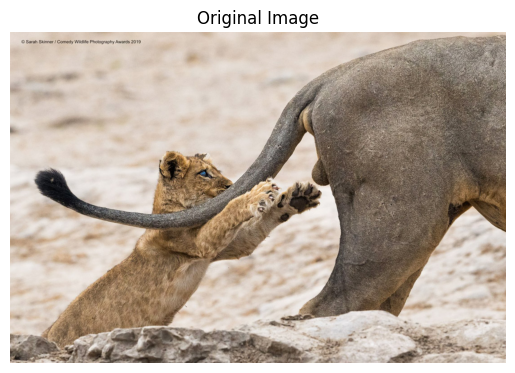

In [16]:
image_bgr = cv2.imread('images/image_3.jpg') 
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # Приводим к RGB

plt.figure()

plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.show()

**Задание 2. Преобразование цветовых пространств:**
* Преобразуйте изображение из RGB в Grayscale и HSV.
* Отобразите каждое из полученных изображений.
* Постройте гистограммы яркости для исходного и серого изображений.

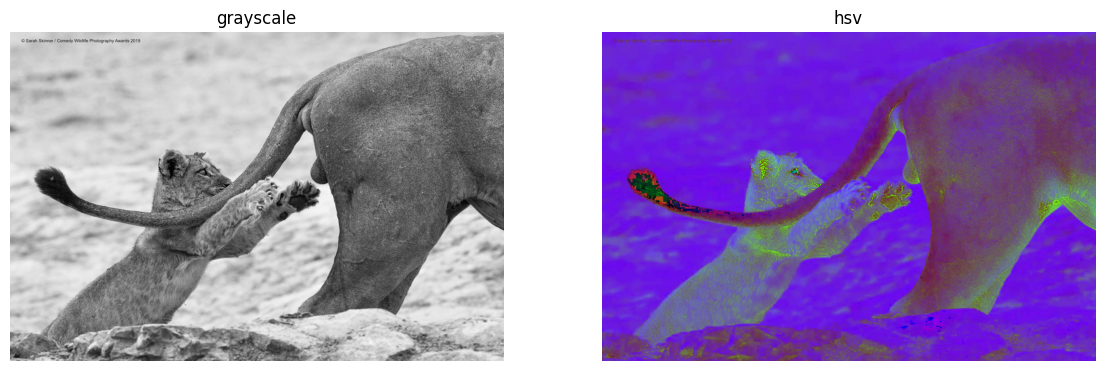

In [38]:
image_grayscale = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2GRAY)
image_hsv       = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(14, 8))

plt.subplot(121)
plt.imshow(image_grayscale, cmap='gray')
plt.title('grayscale')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_hsv)
plt.title('hsv')
plt.axis('off')


plt.show()

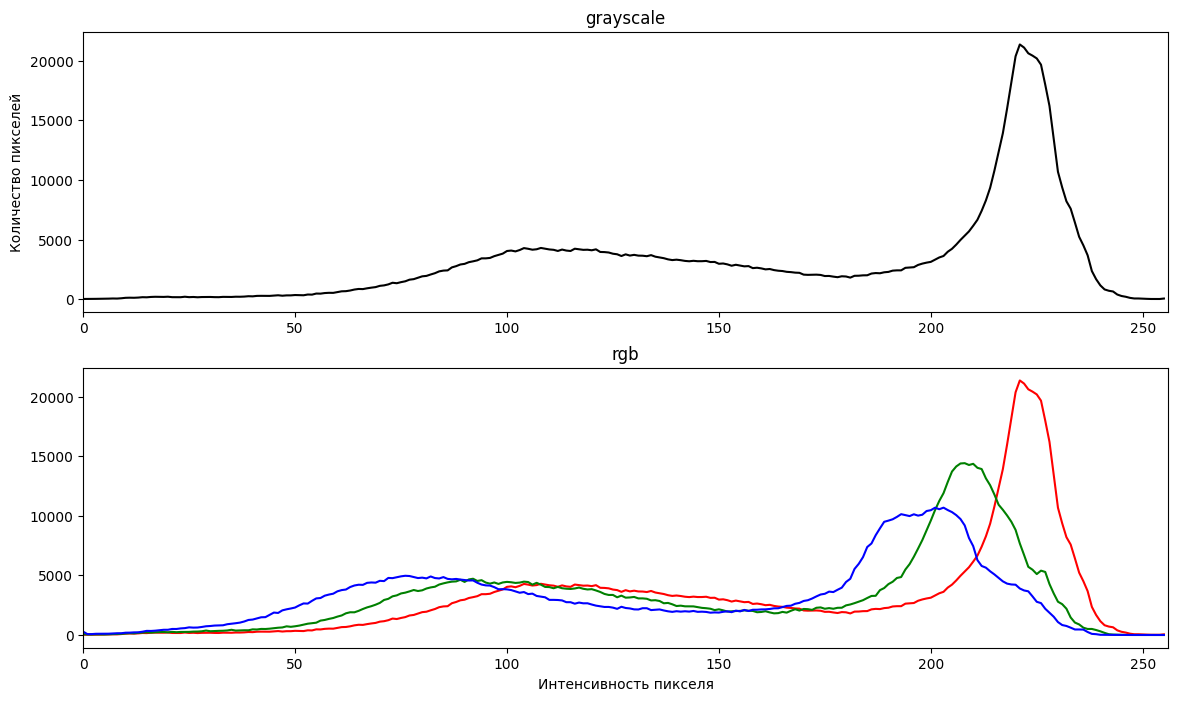

In [182]:
hist_grayscale = cv2.calcHist([image_grayscale], [0], None, [256], [0, 256])
hist_rgb = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])

# Визуализация гистограммы
plt.figure(figsize=(14,8))

plt.subplot(211)
plt.title("grayscale")
plt.ylabel("Количество пикселей")
plt.plot(hist_rgb, color='black')
plt.xlim([0, 256])

plt.subplot(212)
colors = ('r','g','b') 

for i,color in enumerate(colors): 
    hist = cv2.calcHist([image_rgb],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('rgb') 
plt.xlabel("Интенсивность пикселя")
plt.xlim([0, 256])


plt.show()

**Задание 3. Фильтрация изображений:**
* Примените к серому изображению следующие фильтры:
    * Гауссово сглаживание с разными значениями σ (сигма).
    * Медианный фильтр с разными размерами ядра.
    * Фильтр Лапласа для повышения резкости.
* Отобразите результаты фильтрации и сравните их визуально.

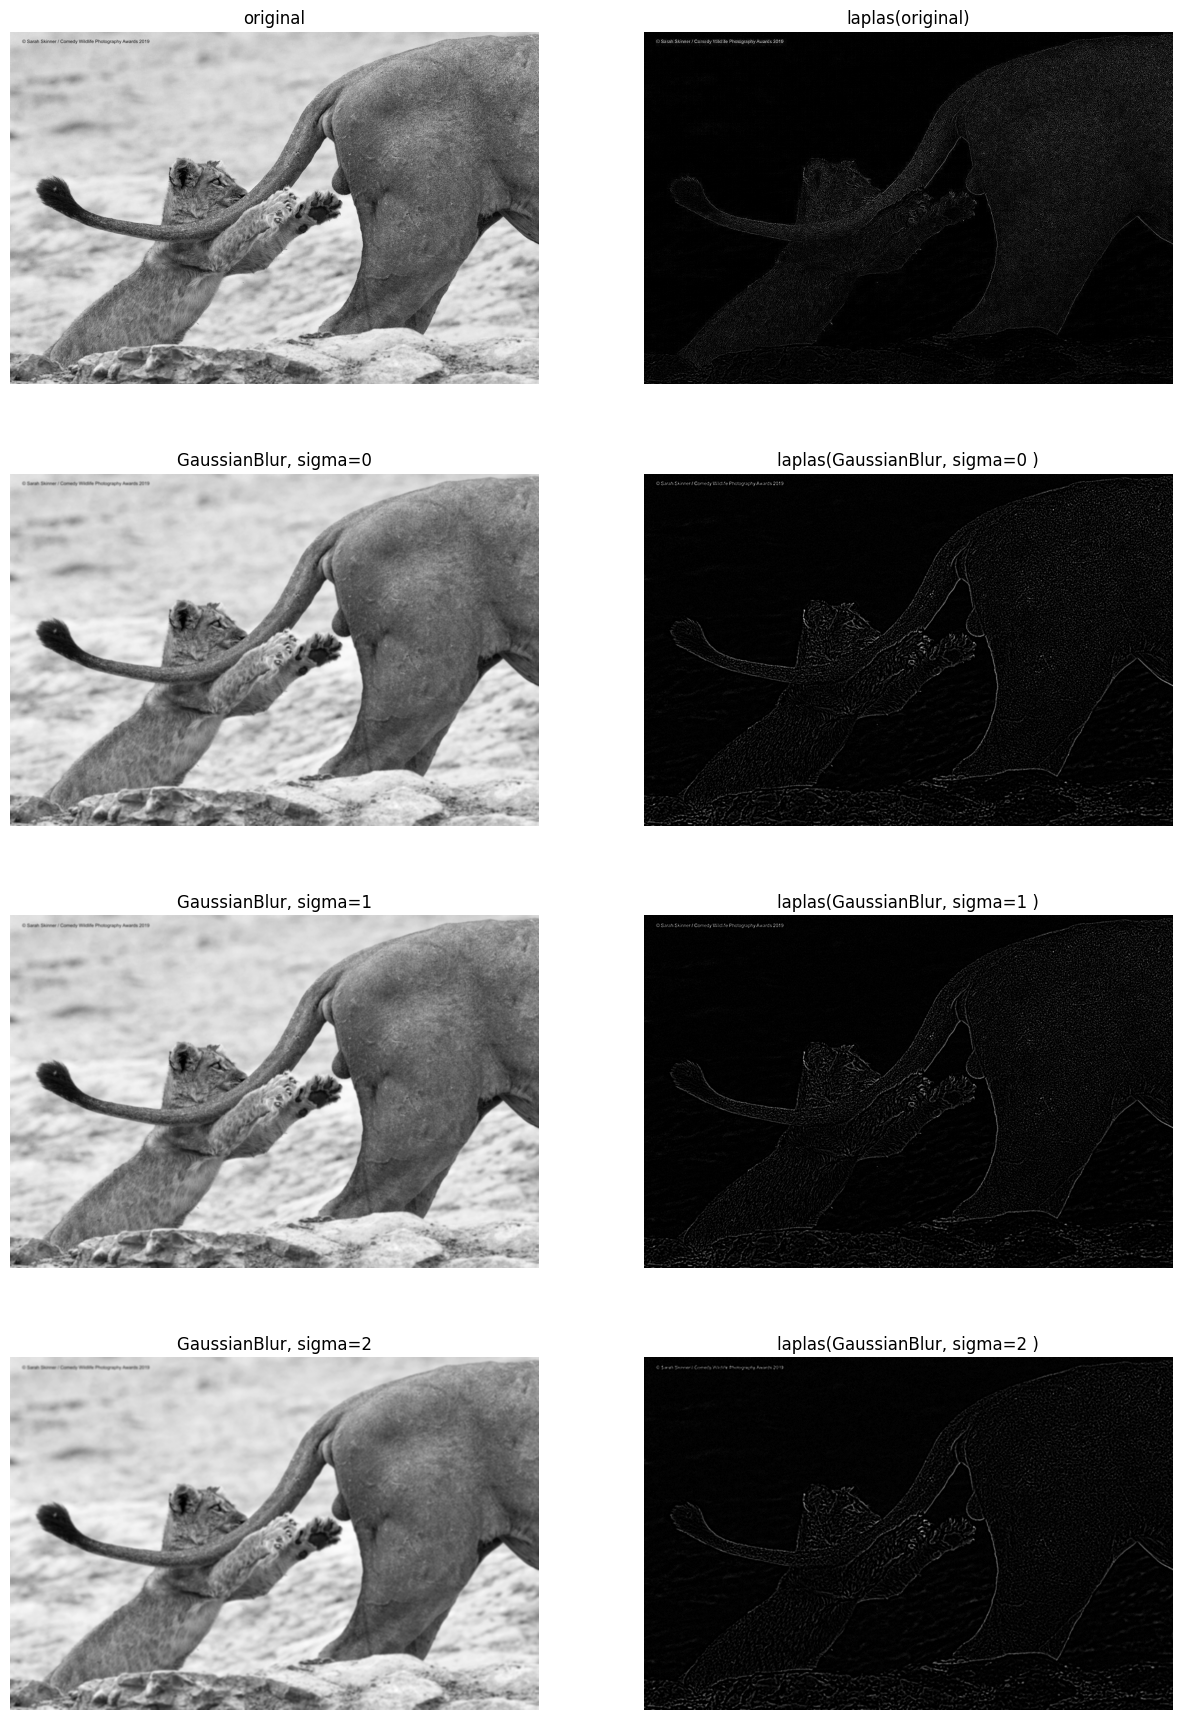

In [109]:
plt.figure(figsize=(15, 22))

plt.subplot(421)
plt.imshow(image_grayscale, cmap='gray')
plt.title(f'original')
plt.axis('off')

plt.subplot(422)
plt.imshow(cv2.Laplacian(image_grayscale, cv2.CV_8U), cmap='gray')
plt.title(f'laplas(original)')
plt.axis('off')

for sigm in range(3):
    image_gray_gaus = cv2.GaussianBlur(image_grayscale, (5, 5), sigm)

    plt.subplot(int(f'42{sigm*2 +3}'))
    plt.imshow(image_gray_gaus, cmap='gray')
    plt.title(f'GaussianBlur, sigma={sigm}')
    plt.axis('off')

    plt.subplot(int(f'42{sigm*2 +4}'))
    plt.imshow(cv2.Laplacian(image_gray_gaus, cv2.CV_8U), cmap='gray')
    plt.title(f'laplas(GaussianBlur, sigma={sigm} )')
    plt.axis('off')

plt.show()


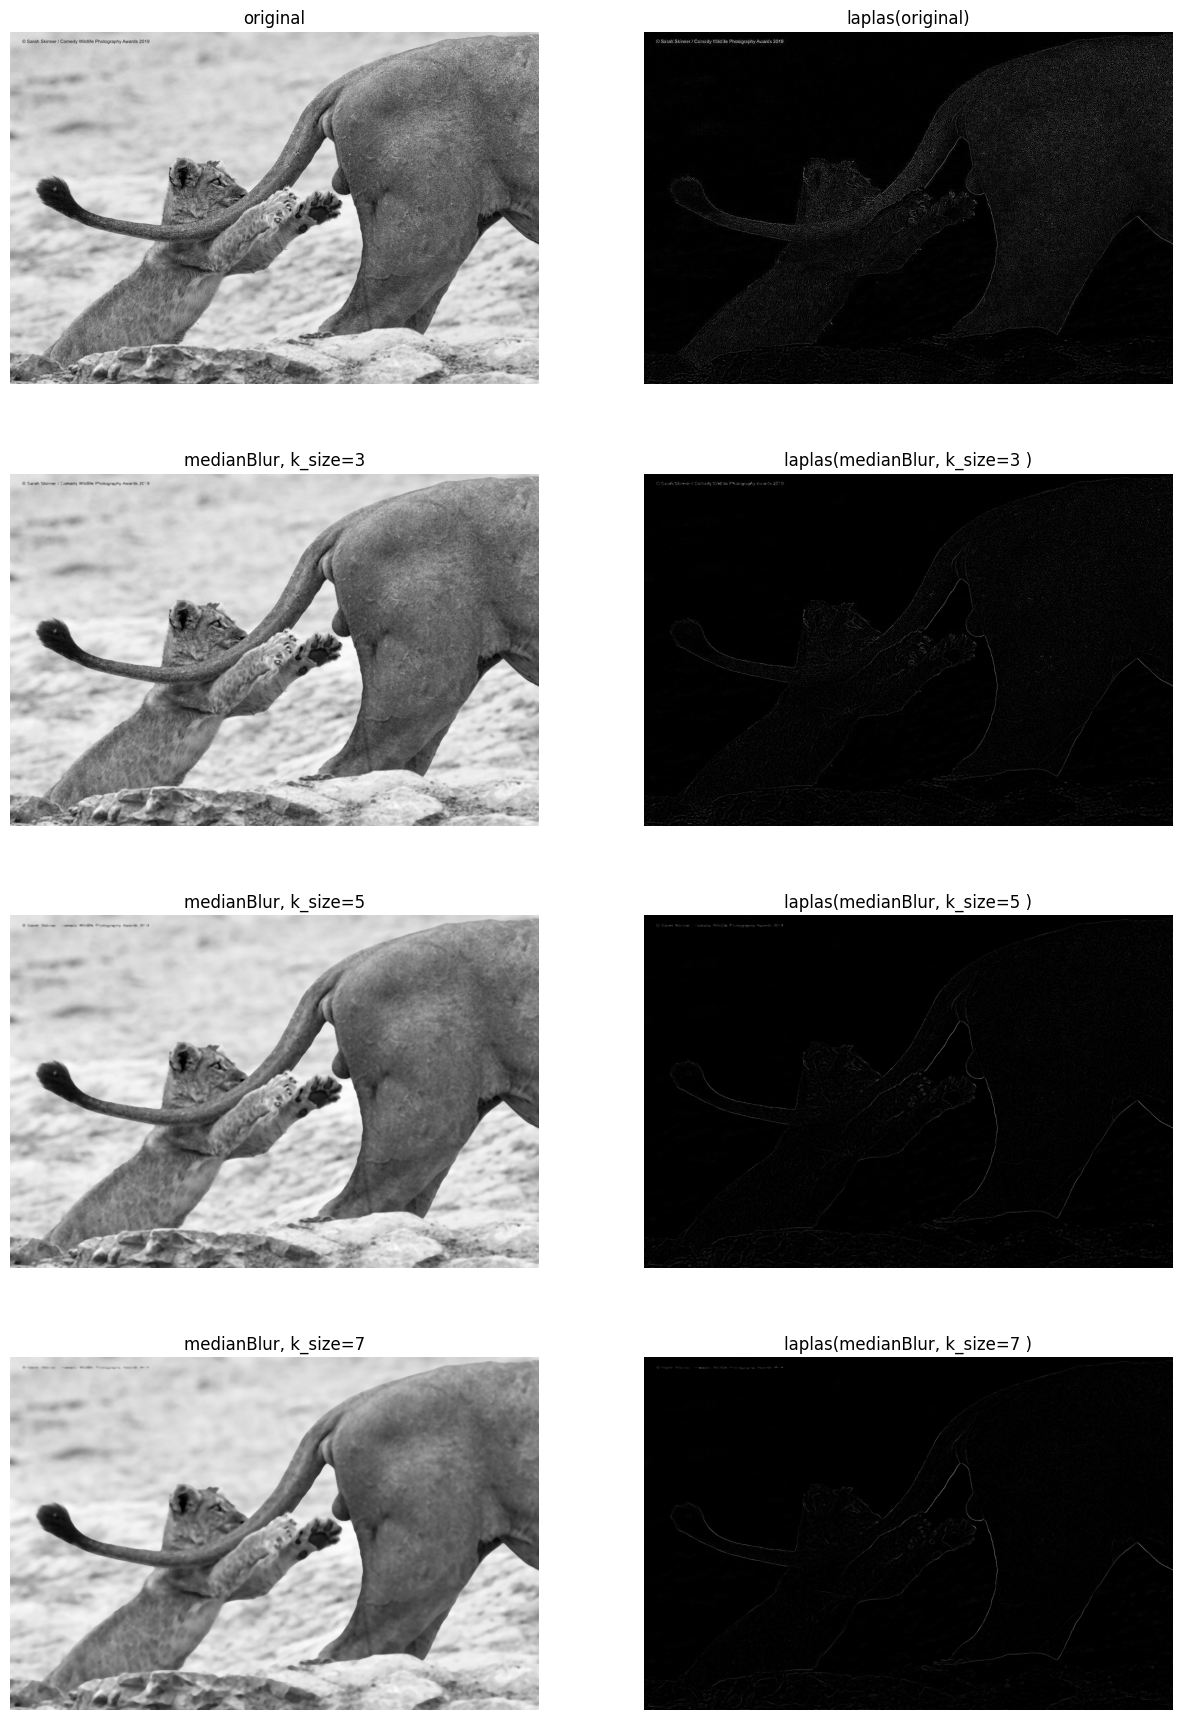

In [112]:
plt.figure(figsize=(15, 22))

plt.subplot(421)
plt.imshow(image_grayscale, cmap='gray')
plt.title(f'original')
plt.axis('off')

plt.subplot(422)
plt.imshow(cv2.Laplacian(image_grayscale, cv2.CV_8U), cmap='gray')
plt.title(f'laplas(original)')
plt.axis('off')

plt_iter = 0 

for k_s in range(3, 8, 2):

    image_gray_median = cv2.medianBlur(image_grayscale, k_s)

    plt.subplot(int(f'42{plt_iter*2 +3}'))
    plt.imshow(image_gray_median, cmap='gray')
    plt.title(f'medianBlur, k_size={k_s}')
    plt.axis('off')

    plt.subplot(int(f'42{plt_iter*2 +4}'))
    plt.imshow(cv2.Laplacian(image_gray_median, cv2.CV_8U), cmap='gray')
    plt.title(f'laplas(medianBlur, k_size={k_s} )')
    plt.axis('off')

    plt_iter += 1

plt.show()

Видно, что фильтр Лапласа на ориганльном изображении находит очень много мелких деталей, которые скорее добавят шума, чем резкости, когда при применении блюра получается находить именно границы. При этом размытие Гауса дает более четкие границы. 

**Задание 4. Выделение краев и углов:**
* Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
* Примените алгоритм Кэнни для обнаружения краев.
* Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
* Наложите результаты на исходное изображение и отобразите.

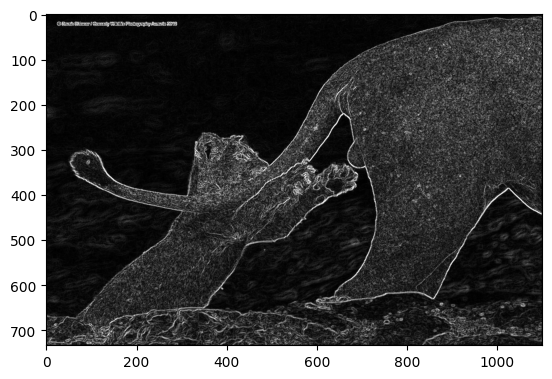

In [114]:
sobel_x = cv2.Sobel(image_grayscale, cv2.CV_64F, 1,0, ksize=3, scale=1)
sobel_y = cv2.Sobel(image_grayscale, cv2.CV_64F, 0,1, ksize=3, scale=1)
abs_sobel_x= cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_edge = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5,0)

plt.figure()
plt.imshow(sobel_edge, cmap='gray')
plt.show()

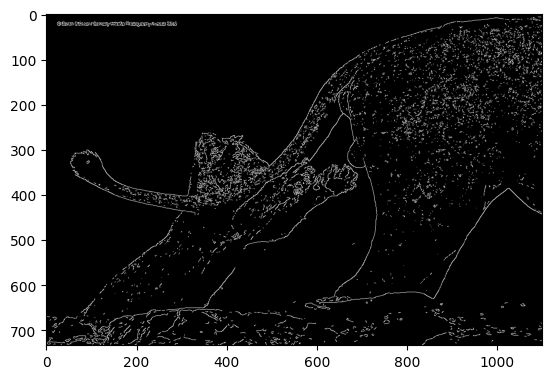

In [156]:
canny_edge = cv2.Canny(image_grayscale, 200, 250) 

plt.figure()
plt.imshow(canny_edge, cmap='gray')
plt.show()

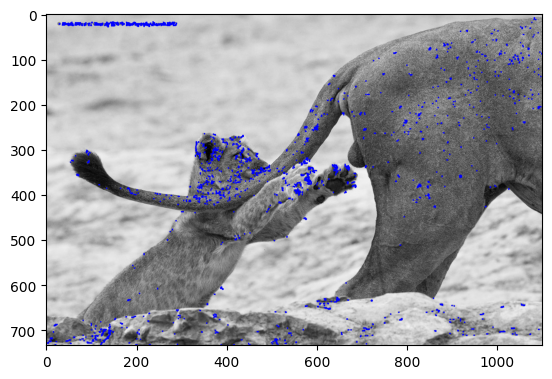

In [166]:
image_harris = image_grayscale.copy()
operatedImage = np.float32(image_harris)
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 
dest = cv2.dilate(dest, None) 

image_harris = cv2.cvtColor(image_harris, cv2.COLOR_GRAY2RGB) 

image_harris[dest > 0.01 * dest.max()]=[0, 0, 255] 

plt.figure()
plt.imshow(image_harris, cmap='gray')
plt.show()

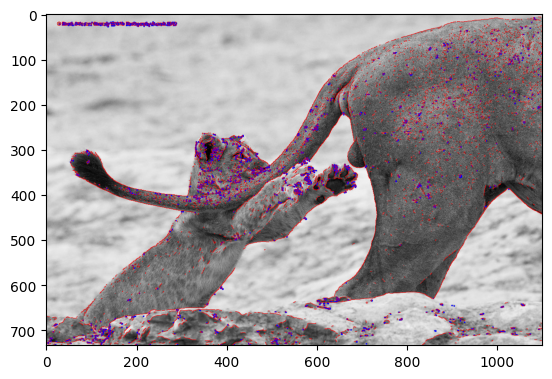

In [167]:
# canny + harris 
image_harris[canny_edge > 0.01] = [255, 0, 0]

plt.figure()
plt.imshow(image_harris, cmap='gray')
plt.title('canny + harris')
plt.show()

**Задание 5. Морфологические операции:**
* Бинаризуйте серое изображение с помощью пороговой сегментации.
* Примените операции эрозии и дилатации с различными структурными элементами.
* Отобразите результаты и объясните эффект каждой операции.

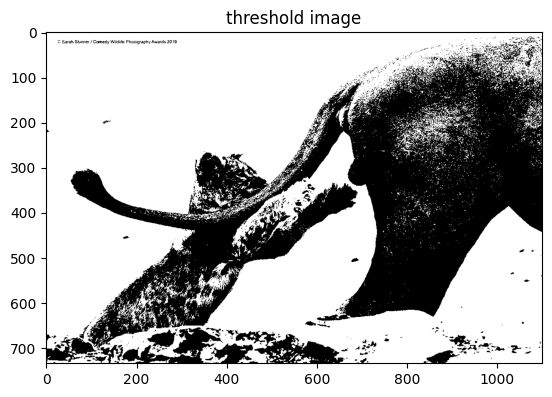

In [170]:
_, image_threshold = cv2.threshold(image_grayscale, 127, 255, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(image_threshold, cmap='gray')
plt.title('threshold image')
plt.show()


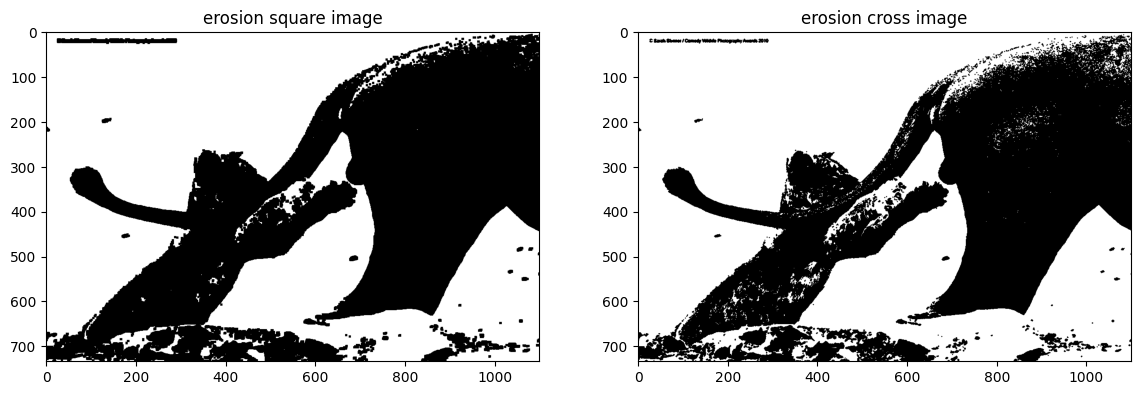

In [175]:
kernel_square = np.ones((5,5), np.uint8)
kernel_cross = np.array([[0,1,0],
                         [1,1,1],
                         [0,1,0]], np.uint8)
    
erosion_square = cv2.erode(image_threshold, kernel_square, iterations=1)
erosion_cross = cv2.erode(image_threshold, kernel_cross, iterations=1)    


plt.figure(figsize=(14, 8))

plt.subplot(121)
plt.imshow(erosion_square, cmap='gray')
plt.title('erosion square image')

plt.subplot(122)
plt.imshow(erosion_cross, cmap='gray')
plt.title('erosion cross image')

plt.show()


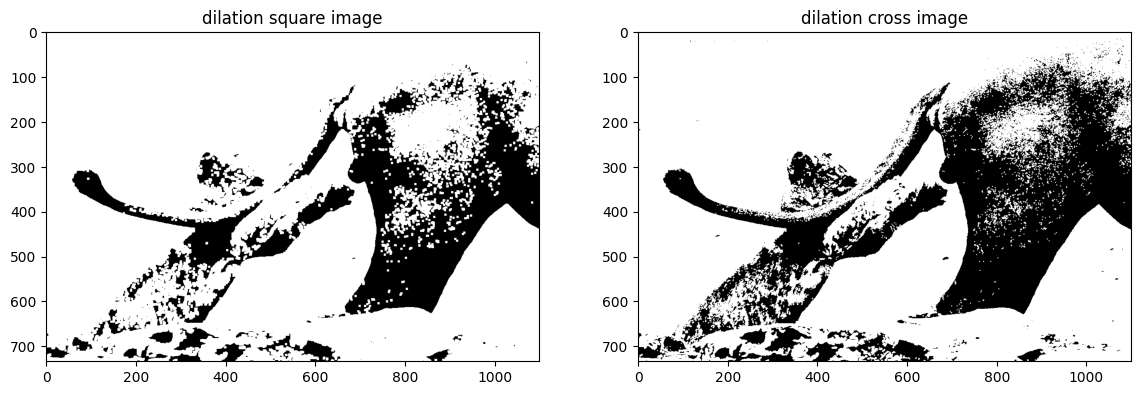

In [176]:
dilation_square = cv2.dilate(image_threshold, kernel_square, iterations=1)
dilation_cross = cv2.dilate(image_threshold, kernel_cross, iterations=1)

plt.figure(figsize=(14, 8))

plt.subplot(121)
plt.imshow(dilation_square, cmap='gray')
plt.title('dilation square image')

plt.subplot(122)
plt.imshow(dilation_cross, cmap='gray')
plt.title('dilation cross image')

plt.show()

Эрозия "съедает" "белый" шум расширяя темные объекты, а делитация "съедает" темные объекты и заполняет "темный" шум

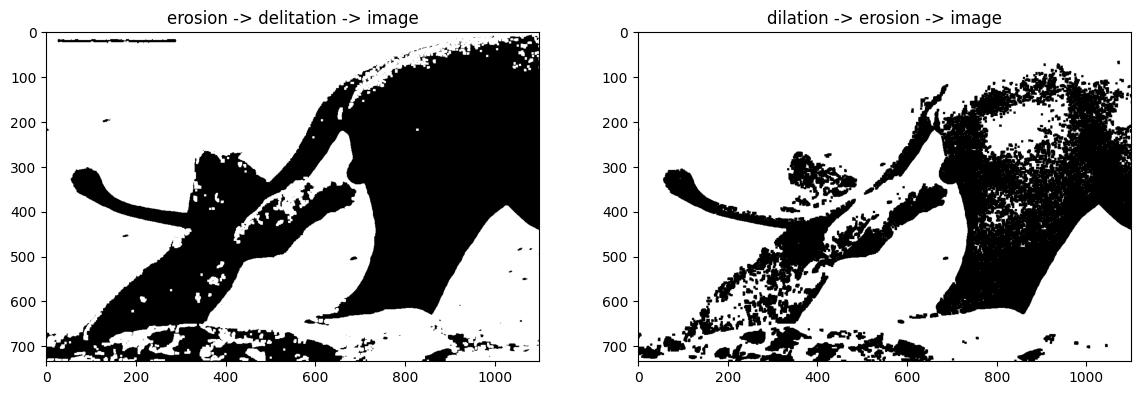

In [179]:
erosion_delitation_square = cv2.dilate(cv2.erode(image_threshold, kernel_square, iterations=1),  kernel_square, iterations=1)
dilation_erosion_square = cv2.erode(cv2.dilate(image_threshold, kernel_square, iterations=1), kernel_square, iterations=1)

plt.figure(figsize=(14, 8))

plt.subplot(121)
plt.imshow(erosion_delitation_square, cmap='gray')
plt.title('erosion -> delitation -> image')

plt.subplot(122)
plt.imshow(dilation_erosion_square, cmap='gray')
plt.title('dilation -> erosion -> image')

plt.show()